# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

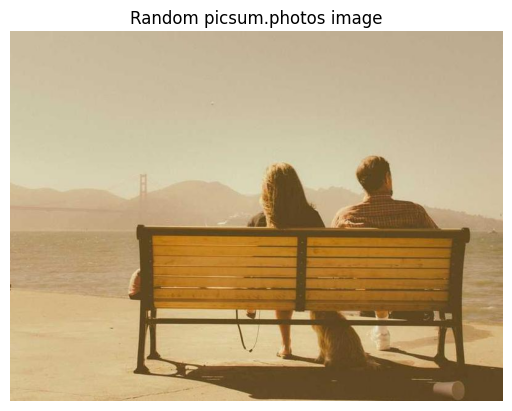

In [6]:
import requests
from PIL import Image
import io
import matplotlib.pyplot as plt

width, height = 800, 600
url = f"https://picsum.photos/{width}/{height}"   # returns a random image

resp = requests.get(url)         # follows redirect by default
resp.raise_for_status()

img = Image.open(io.BytesIO(resp.content))
plt.imshow(img)
plt.axis('off')
plt.title("Random picsum.photos image")
plt.show()

# Save locally if you want
img.save("picsum_random.jpg")


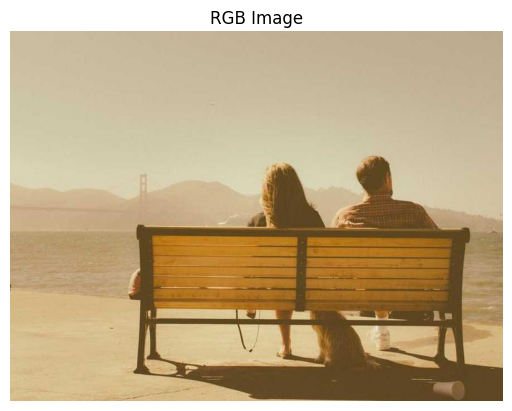

In [7]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

#Loading image
img_path = "picsum_random.jpg"

img = Image.open(img_path).convert("RGB")
rgb_img = np.array(img)   # NumPy RGB image
plt.imshow(rgb_img)
plt.title("RGB Image")
plt.axis("off")
plt.show()


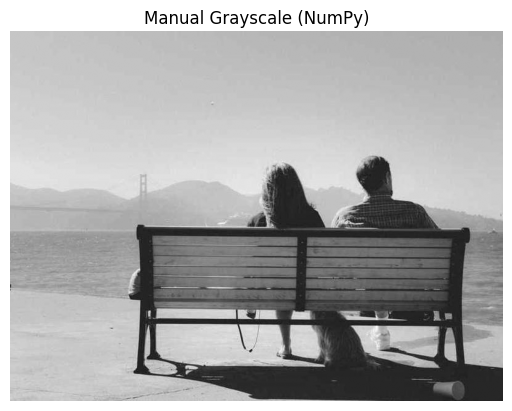

In [8]:
manual_gray = (0.299 * rgb_img[:, :, 0] +
               0.587 * rgb_img[:, :, 1] +
               0.114 * rgb_img[:, :, 2]).astype(np.uint8)

plt.imshow(manual_gray, cmap='gray')
plt.title("Manual Grayscale (NumPy)")
plt.axis("off")
plt.show()

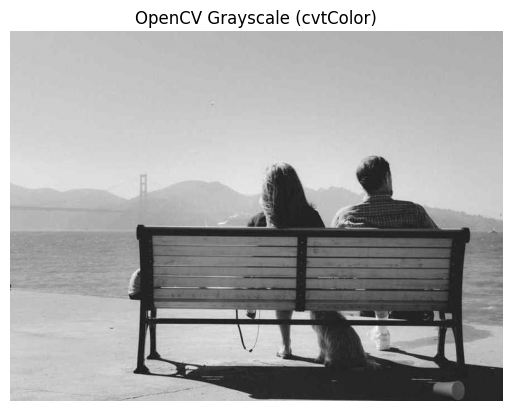

In [9]:
cv_gray = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)

plt.imshow(cv_gray, cmap='gray')
plt.title("OpenCV Grayscale (cvtColor)")
plt.axis("off")
plt.show()

In [10]:
print("RGB shape:              ", rgb_img.shape)
print("Manual grayscale shape: ", manual_gray.shape)
print("cv2 grayscale shape:    ", cv_gray.shape)

RGB shape:               (600, 800, 3)
Manual grayscale shape:  (600, 800)
cv2 grayscale shape:     (600, 800)


In [11]:
print("\nSample pixel at (50,50):")
print("RGB:", rgb_img[50, 50])
print("Manual Gray:", manual_gray[50, 50])
print("OpenCV Gray:", cv_gray[50, 50])

print("\nNote: RGB has 3 channels, grayscale has only 1,so the shape reduces from (H,W,3) to (H,W).")


Sample pixel at (50,50):
RGB: [203 189 160]
Manual Gray: 189
OpenCV Gray: 190

Note: RGB has 3 channels, grayscale has only 1,so the shape reduces from (H,W,3) to (H,W).


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

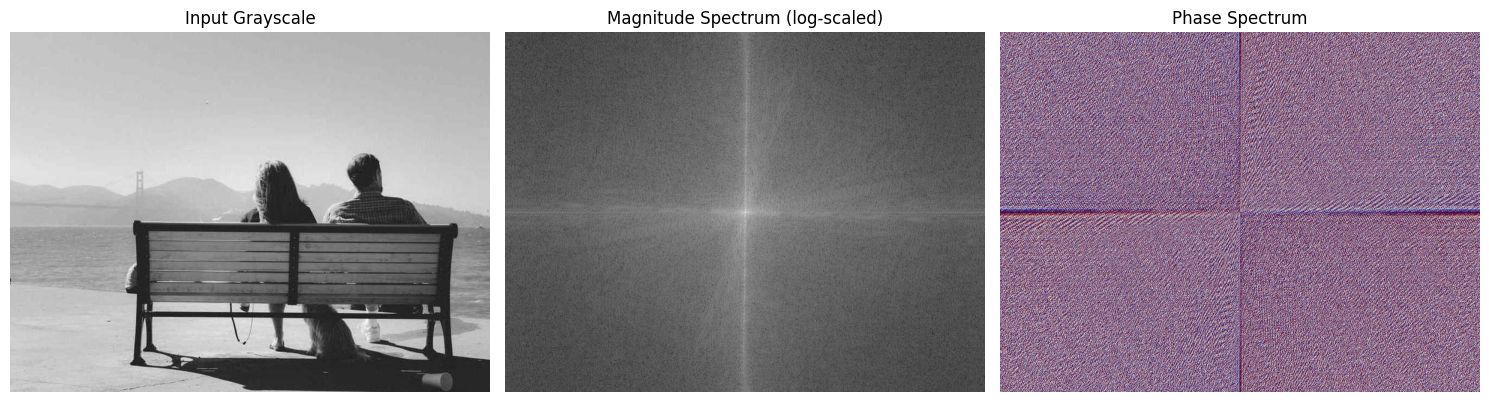

Shapes:
 Grayscale shape: (600, 800)
 FFT shape: (600, 800)
 Shifted FFT (fshift) shape: (600, 800)

Sample magnitude/phase values:
 Center (300, 400): magnitude=77430040.000, log=18.165, phase=0.000
 Corner (0, 0): magnitude=403.000, log=6.001, phase=0.000


In [14]:
gray = manual_gray

gray_f = gray.astype(np.float32)

# B1: Compute FFT using NumPy
F = np.fft.fft2(gray_f)        # 2D FFT
fshift = np.fft.fftshift(F)    # shift zero frequency to center

# B2: Magnitude and Phase
magnitude = np.abs(fshift)     # magnitude spectrum (linear)
phase = np.angle(fshift)       # phase spectrum (radians)

# use of log scale (because magnitude spans many orders)
magnitude_log = np.log1p(magnitude)

# Display Results
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Input Grayscale")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(magnitude_log, cmap='gray')
plt.title("Magnitude Spectrum (log-scaled)")
plt.axis('off')

plt.subplot(1,3,3)
# Phase visualization: rescale to [-pi, pi] mapped to [0,255]
plt.imshow(phase, cmap='twilight')
plt.title("Phase Spectrum")
plt.axis('off')

plt.tight_layout()
plt.show()

# Shape + Sample Values
print("Shapes:")
print(" Grayscale shape:", gray.shape)
print(" FFT shape:", F.shape)
print(" Shifted FFT (fshift) shape:", fshift.shape)
print()

# Sample values
h, w = gray.shape
center = (h//2, w//2)
corner = (0,0)

print("Sample magnitude/phase values:")
print(f" Center {center}: magnitude={magnitude[center]:.3f}, log={magnitude_log[center]:.3f}, phase={phase[center]:.3f}")
print(f" Corner {corner}: magnitude={magnitude[corner]:.3f}, log={magnitude_log[corner]:.3f}, phase={phase[corner]:.3f}")
fshift = fshift

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

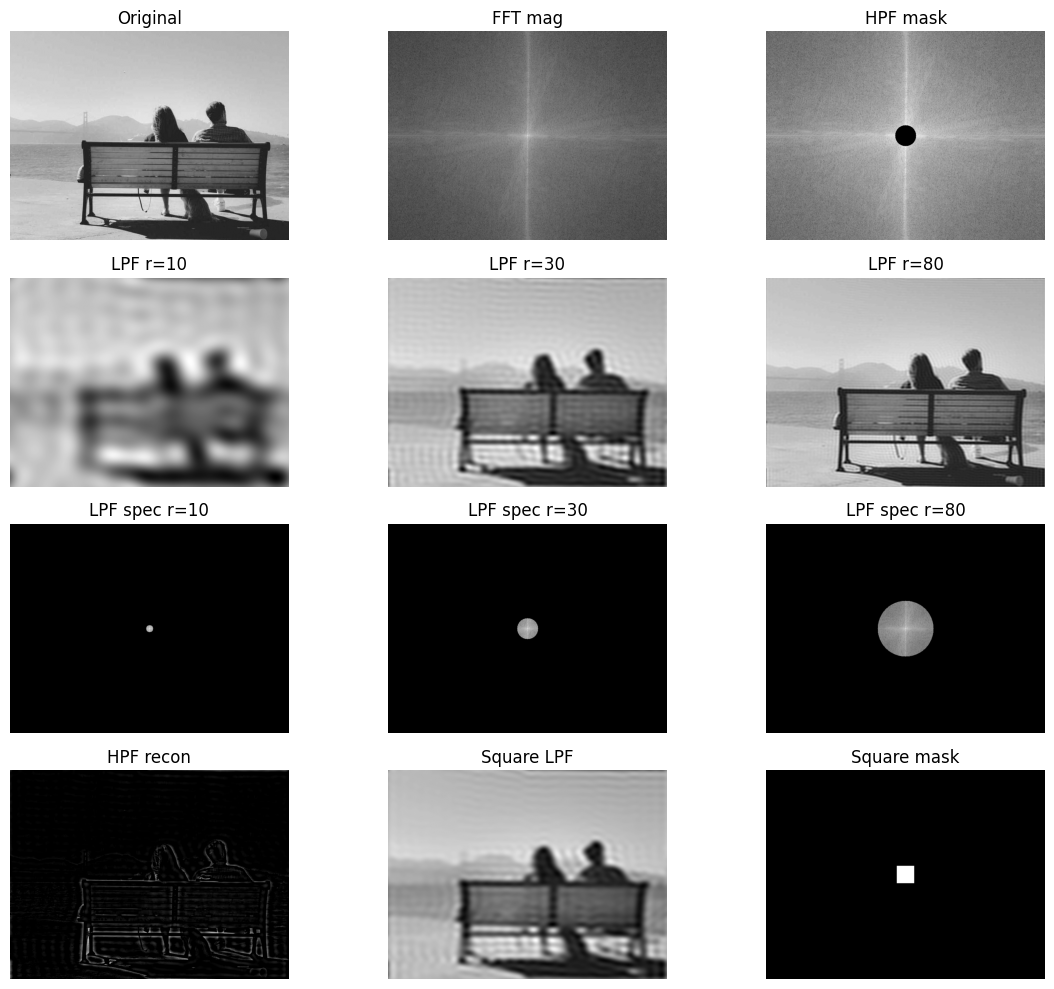

Image shape: (600, 800)
fshift shape: (600, 800)
(0, 0) orig= 190 lpf30= 160 hpf= 29 sq= 161
(300, 400) orig= 138 lpf30= 136 hpf= 1 sq= 139
(599, 799) orig= 71 lpf30= 150 hpf= 0 sq= 153


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# parameters
img_path = "picsum_random.jpg"
lpf_radii = [10, 30, 80]
hp_radius = 30
square_side = 50

# load grayscale
gray = np.array(Image.open(img_path).convert('L')).astype(np.float32)
h, w = gray.shape
cy, cx = h//2, w//2

# FFT
F = np.fft.fft2(gray)
fshift = np.fft.fftshift(F)

# circular mask
def circular_mask(h, w, center, r):
    Y, X = np.ogrid[:h, :w]
    return ((X-center[1])**2 + (Y-center[0])**2 <= r*r).astype(np.float32)

# mask → reconstruct
def reconstruct(fshift, mask):
    masked = fshift * mask
    inv = np.fft.ifftshift(masked)
    img = np.real(np.fft.ifft2(inv))
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img, masked

# LPF
lpf_results = []
for r in lpf_radii:
    m = circular_mask(h, w, (cy, cx), r)
    rec, ms = reconstruct(fshift, m)
    lpf_results.append({'radius': r, 'recon': rec, 'masked': ms})

# HPF
lpf30 = circular_mask(h, w, (cy, cx), hp_radius)
hpf_mask = 1 - lpf30
hpf_recon, hpf_masked = reconstruct(fshift, hpf_mask)

# square LPF
side = min(square_side, h, w)
sq = np.zeros((h,w), np.float32)
half = side//2
y0, y1 = cy-half, cy-half+side
x0, x1 = cx-half, cx-half+side
sq[max(0,y0):min(h,y1), max(0,x0):min(w,x1)] = 1
sq_recon, sq_masked = reconstruct(fshift, sq)

# display
plt.figure(figsize=(12,10))

plt.subplot(4,3,1); plt.imshow(gray, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(4,3,2); plt.imshow(np.log1p(np.abs(fshift)), cmap='gray'); plt.title("FFT mag"); plt.axis('off')
plt.subplot(4,3,3); plt.imshow(np.log1p(np.abs(hpf_masked)), cmap='gray'); plt.title("HPF mask"); plt.axis('off')

for i, r in enumerate(lpf_results):
    plt.subplot(4,3,4+i); plt.imshow(r['recon'], cmap='gray')
    plt.title(f"LPF r={r['radius']}"); plt.axis('off')

for i, r in enumerate(lpf_results):
    plt.subplot(4,3,7+i); plt.imshow(np.log1p(np.abs(r['masked'])), cmap='gray')
    plt.title(f"LPF spec r={r['radius']}"); plt.axis('off')

plt.subplot(4,3,10); plt.imshow(hpf_recon, cmap='gray'); plt.title("HPF recon"); plt.axis('off')
plt.subplot(4,3,11); plt.imshow(sq_recon, cmap='gray'); plt.title("Square LPF"); plt.axis('off')
plt.subplot(4,3,12); plt.imshow(sq, cmap='gray'); plt.title("Square mask"); plt.axis('off')

plt.tight_layout()
plt.show()

# sample values
coords = [(0,0), (h//2, w//2), (h-1, w-1)]
lpf30_rec = next(x['recon'] for x in lpf_results if x['radius']==30)
print("Image shape:", gray.shape)
print("fshift shape:", fshift.shape)
for r,c in coords:
    print((r,c), "orig=", int(gray[r,c]),
          "lpf30=", int(lpf30_rec[r,c]),
          "hpf=", int(hpf_recon[r,c]),
          "sq=", int(sq_recon[r,c]))


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

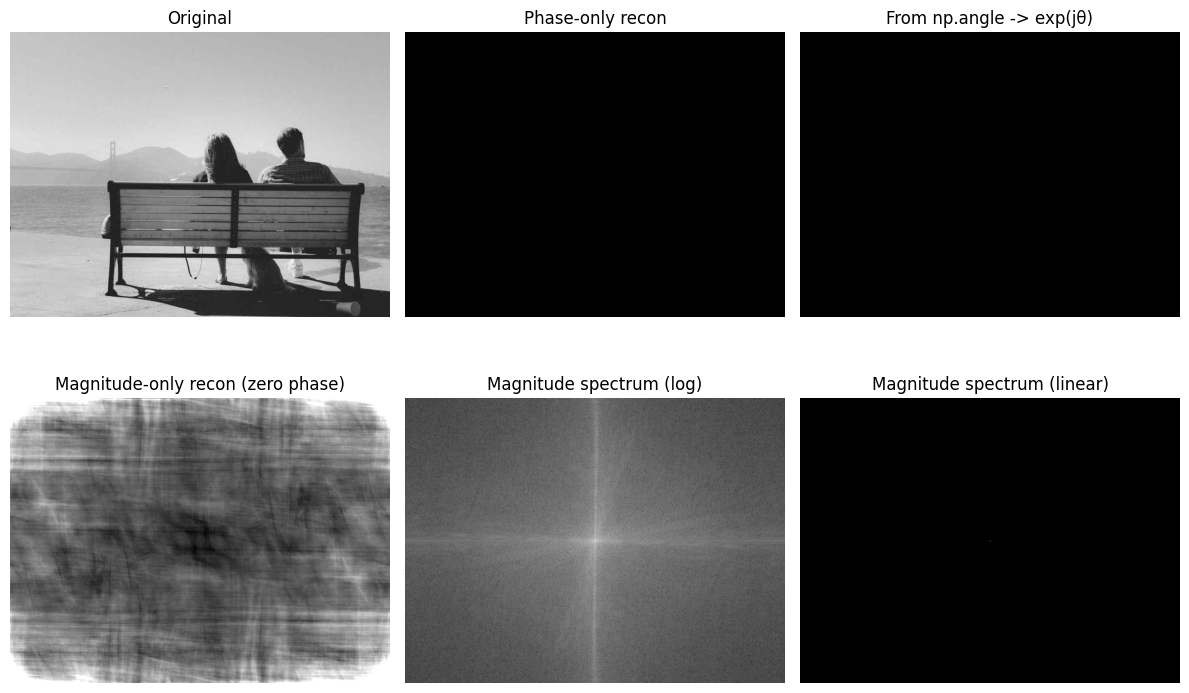

gray shape: (600, 800)
fshift shape: (600, 800)
phase_only min/max: -1.0 1.0
mag min/max: 0.573819 77718270.0

Notes (short):
- phase_only ~ exp(1j*angle). Both keep phase info only.
- recon from phase retains image structure; phase encodes edges/position.
- mag-only (zero phase) loses positional info; output looks like blobs / poor structural content.
- log compresses magnitude dynamic range for visualization (reveals weak components).


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# load grayscale and compute fshift if not present
img_path = "picsum_random.jpg"
gray = np.array(Image.open(img_path).convert('L')).astype(np.float32)
F = np.fft.fft2(gray)
fshift = np.fft.fftshift(F)

eps = 1e-9

# D1: Phase-only
# phase_only is complex unit phasor: keeps phase, discards magnitude
phase_only = fshift / (np.abs(fshift) + eps)
# reconstruct
inv_phase = np.fft.ifftshift(phase_only)
recon_phase = np.real(np.fft.ifft2(inv_phase))
recon_phase = np.clip(recon_phase, 0, 255).astype(np.uint8)


angle = np.angle(fshift)
from_angle = np.exp(1j * angle)
inv_from_angle = np.fft.ifftshift(from_angle)
recon_from_angle = np.real(np.fft.ifft2(inv_from_angle))
recon_from_angle = np.clip(recon_from_angle, 0, 255).astype(np.uint8)

#D2- Magnitude only
mag_only = np.abs(fshift)
# create complex spectrum with mag and zero phase (phase=0)
mag_zero_phase = mag_only * np.exp(1j * 0.0)
inv_mag = np.fft.ifftshift(mag_zero_phase)
recon_mag = np.real(np.fft.ifft2(inv_mag))
# recon_mag may have very different scale -> normalize/clip for display
recon_mag = np.clip(recon_mag, 0, 255).astype(np.uint8)

# Show magnitude spectrum: linear vs log
mag = np.abs(fshift)
mag_log = np.log1p(mag)


# Display
plt.figure(figsize=(12,8))

plt.subplot(2,3,1); plt.imshow(gray.astype(np.uint8), cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(2,3,2); plt.imshow(recon_phase, cmap='gray'); plt.title("Phase-only recon"); plt.axis('off')
plt.subplot(2,3,3); plt.imshow(recon_from_angle, cmap='gray'); plt.title("From np.angle -> exp(jθ)"); plt.axis('off')

plt.subplot(2,3,4); plt.imshow(recon_mag, cmap='gray'); plt.title("Magnitude-only recon (zero phase)"); plt.axis('off')
plt.subplot(2,3,5); plt.imshow(mag_log, cmap='gray'); plt.title("Magnitude spectrum (log)"); plt.axis('off')
plt.subplot(2,3,6); plt.imshow(mag, cmap='gray'); plt.title("Magnitude spectrum (linear)"); plt.axis('off')

plt.tight_layout()
plt.show()

# Print shapes & small diagnostics
print("gray shape:", gray.shape)
print("fshift shape:", fshift.shape)
print("phase_only min/max:", phase_only.real.min(), phase_only.real.max())
print("mag min/max:", mag.min(), mag.max())
print("\nNotes (short):")
print("- phase_only -exp(1j*angle). Both keep phase info only.")
print("- recon from phase retains image structure; phase encodes edges/position.")
print("- mag-only (zero phase) loses positional info; output looks like blobs / poor structural content.")
print("- log compresses magnitude dynamic range for visualization (reveals weak components).")


## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

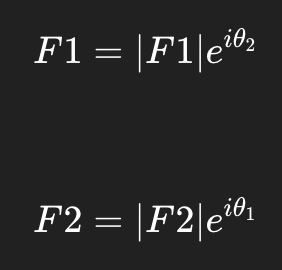

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

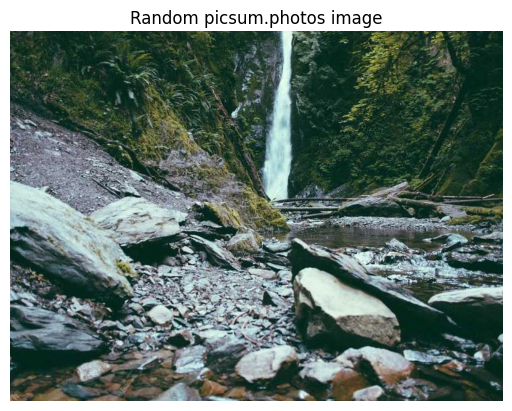

In [19]:
import requests
from PIL import Image
import io
import matplotlib.pyplot as plt

width, height = 800, 600
url = f"https://picsum.photos/{width}/{height}"   # returns a random image

resp = requests.get(url)         # follows redirect by default
resp.raise_for_status()

img = Image.open(io.BytesIO(resp.content))
plt.imshow(img)
plt.axis('off')
plt.title("Random picsum.photos image")
plt.show()

# Save locally if you want
img.save("picsum_random_2.jpg")


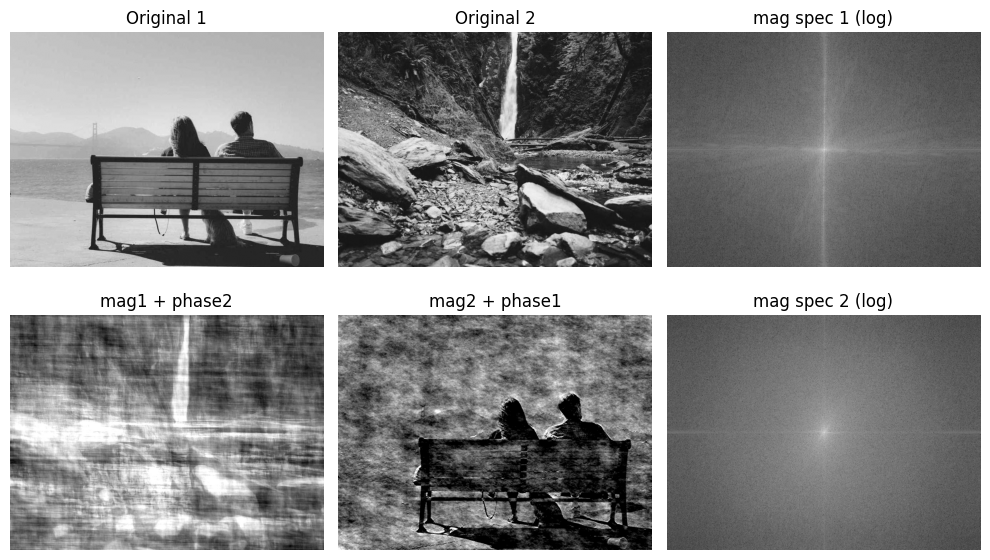

In [22]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# paths
img1_path = "picsum_random.jpg"
img2_path = "picsum_random_2.jpg"

# load grayscale images (resize second to match first)
def load_gray(path, size=None):
    im = Image.open(path).convert("L")
    if size is not None and im.size != size:
        im = im.resize(size, Image.BILINEAR)
    return np.array(im).astype(np.float32), im.size

if not os.path.exists(img1_path):
    img1_path, img2_path = img2_path, img1_path

img1_arr, size1 = load_gray(img1_path)
img2_arr, _ = load_gray(img2_path, size=(size1[0], size1[1]))

# FFT and shift
F1 = np.fft.fft2(img1_arr)
F2 = np.fft.fft2(img2_arr)
f1 = np.fft.fftshift(F1)
f2 = np.fft.fftshift(F2)

# get magnitude & phase
mag1, mag2 = np.abs(f1), np.abs(f2)
phase1, phase2 = np.angle(f1), np.angle(f2)

# swap: (mag1 + phase2) and (mag2 + phase1)
c1 = mag1 * np.exp(1j * phase2)
c2 = mag2 * np.exp(1j * phase1)

# reconstruct images
r1 = np.fft.ifft2(np.fft.ifftshift(c1))
r2 = np.fft.ifft2(np.fft.ifftshift(c2))

# convert to displayable uint8
r1_img = np.clip(np.real(r1), 0, 255).astype(np.uint8)
r2_img = np.clip(np.real(r2), 0, 255).astype(np.uint8)
orig1_img = img1_arr.astype(np.uint8)
orig2_img = img2_arr.astype(np.uint8)

# display
plt.figure(figsize=(10,6))
plt.subplot(2,3,1); plt.imshow(orig1_img, cmap='gray'); plt.title("Original 1"); plt.axis('off')
plt.subplot(2,3,2); plt.imshow(orig2_img, cmap='gray'); plt.title("Original 2"); plt.axis('off')
plt.subplot(2,3,4); plt.imshow(r1_img, cmap='gray'); plt.title("mag1 + phase2"); plt.axis('off')
plt.subplot(2,3,5); plt.imshow(r2_img, cmap='gray'); plt.title("mag2 + phase1"); plt.axis('off')
plt.subplot(2,3,3); plt.imshow(np.log1p(np.abs(np.fft.fftshift(F1))), cmap='gray'); plt.title("mag spec 1 (log)"); plt.axis('off')
plt.subplot(2,3,6); plt.imshow(np.log1p(np.abs(np.fft.fftshift(F2))), cmap='gray'); plt.title("mag spec 2 (log)"); plt.axis('off')
plt.tight_layout()
plt.show()

# phase controls structure; magnitude controls texture/contrast
